In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [102]:
picard = pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/03.align/allBam.picard_collectAlignmentSummaryMetrix.txt", sep = '\t', header = None)
picard.columns = ['sampleID','fileName','CATEGORY', 'TOTAL_READS', 'PF_READS', 'PCT_PF_READS', 'PF_NOISE_READS', 'PF_READS_ALIGNED', 'PCT_PF_READS_ALIGNED',
                  'PF_ALIGNED_BASES', 'PF_HQ_ALIGNED_READS', 'PF_HQ_ALIGNED_BASES', 'PF_HQ_ALIGNED_Q20_BASES', 'PF_HQ_MEDIAN_MISMATCHES', 'PF_MISMATCH_RATE', 'PF_HQ_ERROR_RATE',
                  'PF_INDEL_RATE', 'MEAN_READ_LENGTH', 'SD_READ_LENGTH', 'MEDIAN_READ_LENGTH', 'MAD_READ_LENGTH', 'MIN_READ_LENGTH', 'MAX_READ_LENGTH', 'MEAN_ALIGNED_READ_LENGTH',
                  'READS_ALIGNED_IN_PAIRS', 'PCT_READS_ALIGNED_IN_PAIRS', 'PF_READS_IMPROPER_PAIRS', 'PCT_PF_READS_IMPROPER_PAIRS', 'BAD_CYCLES', 'STRAND_BALANCE', 'PCT_CHIMERAS',
                  'PCT_ADAPTER', 'PCT_SOFTCLIP', 'PCT_HARDCLIP', 'AVG_POS_3PRIME_SOFTCLIP_LENGTH', 'SAMPLE', 'LIBRARY', 'READ_GROUP']
# Replace "ONT-Revio" with "Revio" in the "sampleID" column
picard['sampleID'] = picard['sampleID'].str.replace('ONT_Revio', 'Revio')

In [103]:
picard.head()

,sampleID,fileName,CATEGORY,TOTAL_READS,PF_READS,PCT_PF_READS,PF_NOISE_READS,PF_READS_ALIGNED,PCT_PF_READS_ALIGNED,PF_ALIGNED_BASES,...,BAD_CYCLES,STRAND_BALANCE,PCT_CHIMERAS,PCT_ADAPTER,PCT_SOFTCLIP,PCT_HARDCLIP,AVG_POS_3PRIME_SOFTCLIP_LENGTH,SAMPLE,LIBRARY,READ_GROUP
0,hg002-ONT_cDNA-NA24143,hg002-ONT_cDNA-NA24143.sorted.picard_collectAl...,UNPAIRED,81346990,81346990,1,0,38593546,0.474431,30502381347,...,0,0.501357,0.011611,0,0.198566,0,103.353695,NaN,NaN,NaN
1,hg002-ONT_cDNA-NA24385,hg002-ONT_cDNA-NA24385.sorted.picard_collectAl...,UNPAIRED,57355400,57355400,1,0,35410406,0.617386,20626511257,...,0,0.501344,0.012216,0,0.256425,0,101.633940,NaN,NaN,NaN
2,hg002-ONT_cDNA-NA24631,hg002-ONT_cDNA-NA24631.sorted.picard_collectAl...,UNPAIRED,67690070,67690070,1,0,60195278,0.889278,52870976552,...,0,0.501534,0.014713,0,0.218159,0,105.656804,NaN,NaN,NaN
3,hg002-ONT_cDNA-NA26105,hg002-ONT_cDNA-NA26105.sorted.picard_collectAl...,UNPAIRED,73124497,73124497,1,0,51665419,0.706541,42292484945,...,0,0.500626,0.011692,0,0.218088,0,108.702474,NaN,NaN,NaN
4,hg002-ONT_cDNA-NA27730,hg002-ONT_cDNA-NA27730.sorted.picard_collectAl...,UNPAIRED,48070040,48070040,1,0,39696379,0.825803,37439793274,...,0,0.501025,0.013555,0,0.203237,0,106.310445,NaN,NaN,NaN


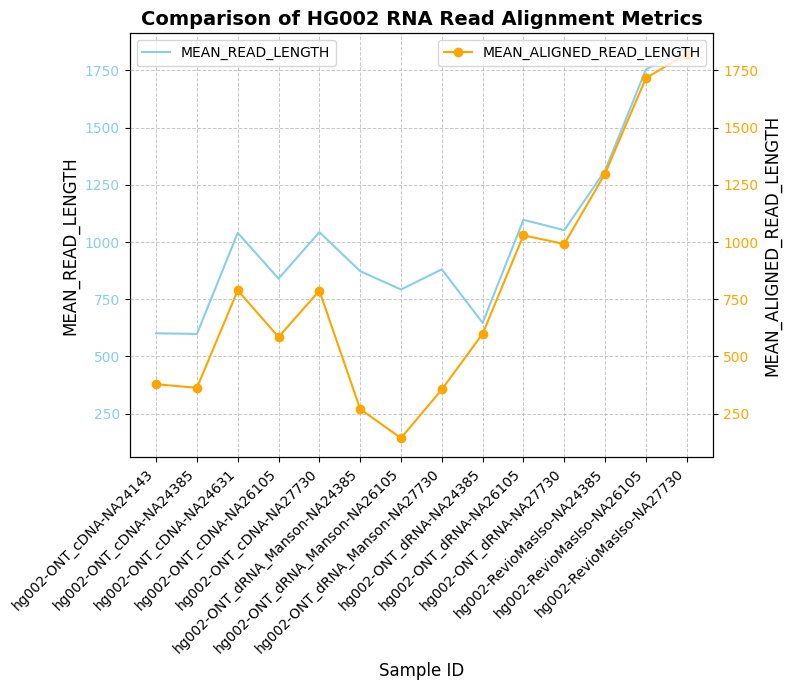

In [138]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 7))

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

left = 'MEAN_READ_LENGTH'
right = 'MEAN_ALIGNED_READ_LENGTH'


# Plot the bar chart
bars = ax1.plot(picard['sampleID'], picard[left], color='skyblue', label=left)

# Plot the line chart
line, = ax2.plot(picard['sampleID'], picard[right], color='orange', marker='o', linestyle='-', label=right)

# Customize the appearance
ax1.set_xlabel("Sample ID", fontsize=12)
ax1.set_ylabel(left, fontsize=12)
ax2.set_ylabel(right, fontsize=12)

# Set titles and legends
ax1.set_title("Comparison of HG002 RNA Read Alignment Metrics", fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Customize tick parameters
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax2.tick_params(axis='y', labelcolor='orange')

# Add gridlines
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

for tick in ax1.get_xticklabels():
    tick.set_ha('right')

# Add gridlines
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
# Synchronize y-axis limits
# Determine the range needed for both y-axes
y1_limits = ax1.get_ylim()
y2_limits = ax2.get_ylim()

# Find the min and max limits
y_min = min(y1_limits[0], y2_limits[0])
y_max = max(y1_limits[1], y2_limits[1])

# Set the same limits for both y-axes
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)


# Adjust layout to make room for rotated x-axis labels
fig.tight_layout()

# Show the plot
plt.show()


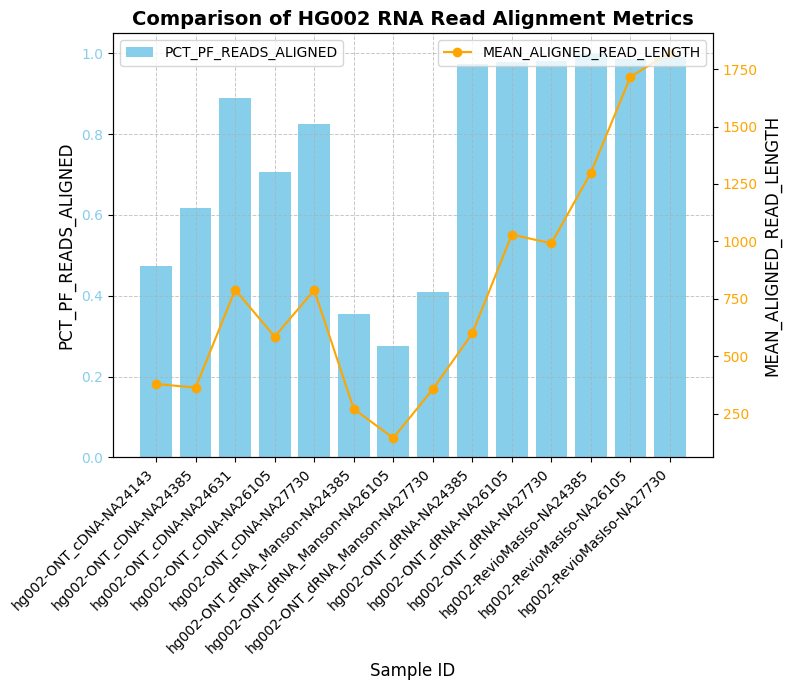

In [107]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 7))

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

left = 'PCT_PF_READS_ALIGNED'
right = 'MEAN_ALIGNED_READ_LENGTH'


# Plot the bar chart
bars = ax1.bar(picard['sampleID'], picard[left], color='skyblue', label=left)

# Plot the line chart
line, = ax2.plot(picard['sampleID'], picard[right], color='orange', marker='o', linestyle='-', label=right)

# Customize the appearance
ax1.set_xlabel("Sample ID", fontsize=12)
ax1.set_ylabel(left, fontsize=12)
ax2.set_ylabel(right, fontsize=12)

# Set titles and legends
ax1.set_title("Comparison of HG002 RNA Read Alignment Metrics", fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Customize tick parameters
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax2.tick_params(axis='y', labelcolor='orange')

# Add gridlines
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

for tick in ax1.get_xticklabels():
    tick.set_ha('right')

# Add gridlines
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)


# Adjust layout to make room for rotated x-axis labels
fig.tight_layout()

# Show the plot
plt.show()


## Histogram

In [119]:
histo = pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/03.align/histogram.txt", sep = "\t" , header= None)
histo.columns = ['sampleid',"READ_LENGTH","UNPAIRED_TOTAL_LENGTH_COUNT","UNPAIRED_ALIGNED_LENGTH_COUNT"]
histo = histo.loc[histo['READ_LENGTH'] != 0,]
histo.head()

,sampleid,READ_LENGTH,UNPAIRED_TOTAL_LENGTH_COUNT,UNPAIRED_ALIGNED_LENGTH_COUNT
1,hg002-ONT_cDNA-NA24143,10,4,0
2,hg002-ONT_cDNA-NA24143,11,1,0
3,hg002-ONT_cDNA-NA24143,12,6,0
4,hg002-ONT_cDNA-NA24143,13,1,0
5,hg002-ONT_cDNA-NA24143,14,4,0


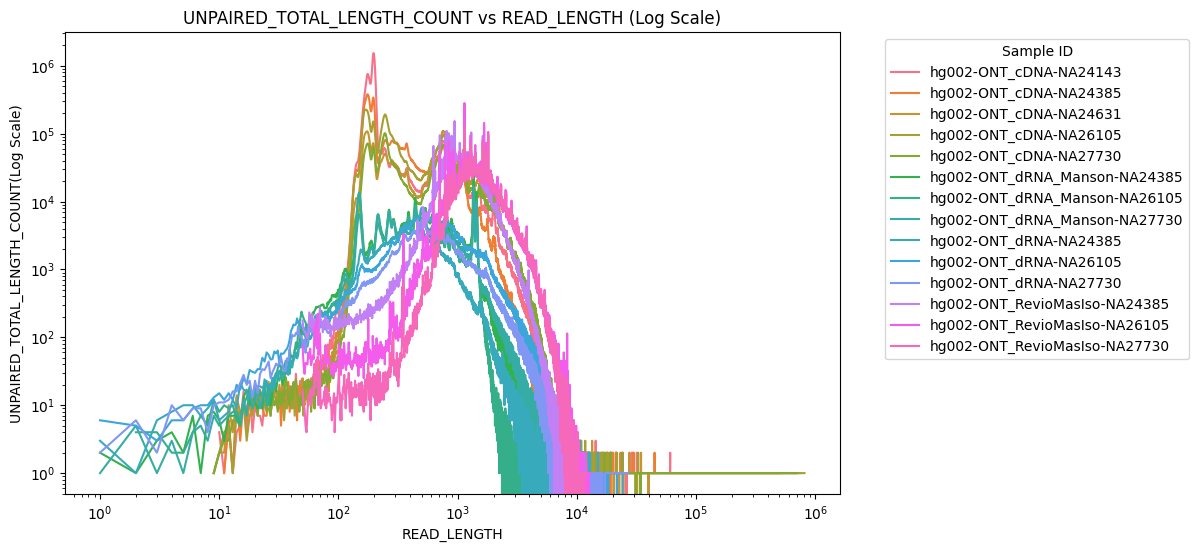

In [137]:
plt.figure(figsize=(10, 6))


window_size = 100
# histo['SMOOTHED'] = histo['UNPAIRED_TOTAL_LENGTH_COUNT'].rolling(window=window_size).mean()
# ax = sns.lineplot(data=histo, x='READ_LENGTH', y='UNPAIRED_TOTAL_LENGTH_COUNT', hue='sampleid', marker='o')
# ax = sns.lineplot(data=histo, x='READ_LENGTH', y='SMOOTHED', hue='sampleid', marker='o')
y = 'UNPAIRED_TOTAL_LENGTH_COUNT'

ax = sns.lineplot(data=histo, x='READ_LENGTH', y=y, hue='sampleid', linestyle='-',legend=True)
# sns.lineplot(data=histo, x='READ_LENGTH', y='SMOOTHED', hue='sampleid', linestyle='--', label='Smoothed', legend=False)


# Set y-axis to logarithmic scale
ax.set_yscale('log')
ax.set_xscale('log')

# Customizing the plot
plt.title(y + ' vs READ_LENGTH (Log Scale)')
plt.xlabel('READ_LENGTH')
plt.ylabel(y + '(Log Scale)')
plt.legend(title='Sample ID')
ax.legend(title='Sample ID', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

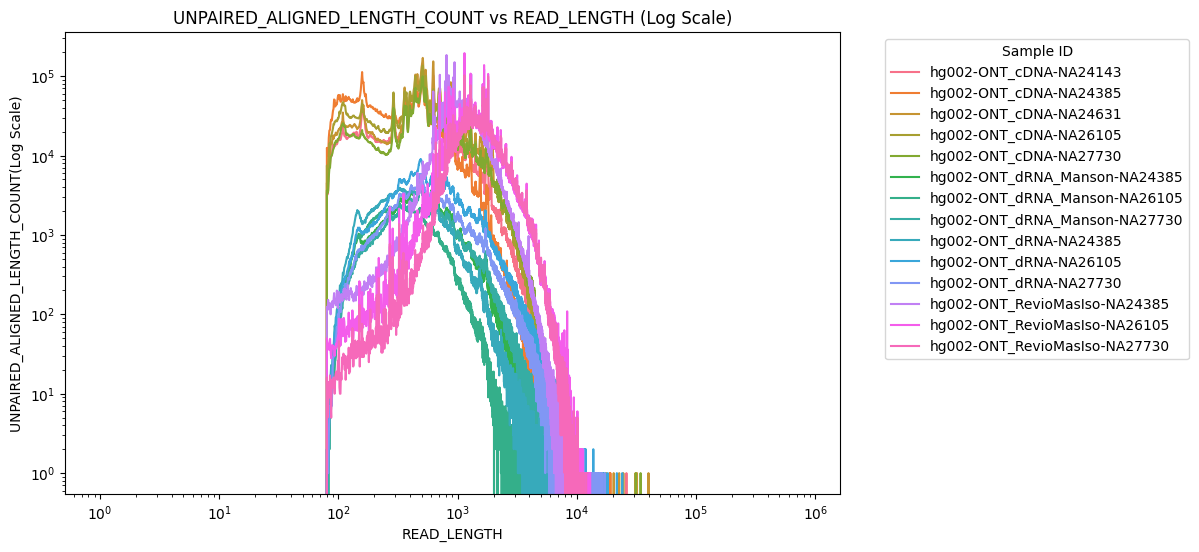

In [139]:
plt.figure(figsize=(10, 6))


window_size = 100
# histo['SMOOTHED'] = histo['UNPAIRED_TOTAL_LENGTH_COUNT'].rolling(window=window_size).mean()
# ax = sns.lineplot(data=histo, x='READ_LENGTH', y='UNPAIRED_TOTAL_LENGTH_COUNT', hue='sampleid', marker='o')
# ax = sns.lineplot(data=histo, x='READ_LENGTH', y='SMOOTHED', hue='sampleid', marker='o')
y = 'UNPAIRED_ALIGNED_LENGTH_COUNT'

ax = sns.lineplot(data=histo, x='READ_LENGTH', y=y, hue='sampleid', linestyle='-',legend=True)
# sns.lineplot(data=histo, x='READ_LENGTH', y='SMOOTHED', hue='sampleid', linestyle='--', label='Smoothed', legend=False)


# Set y-axis to logarithmic scale
ax.set_yscale('log')
ax.set_xscale('log')

# Customizing the plot
plt.title(y + ' vs READ_LENGTH (Log Scale)')
plt.xlabel('READ_LENGTH')
plt.ylabel(y + '(Log Scale)')
plt.legend(title='Sample ID')
ax.legend(title='Sample ID', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()